In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [14]:
df = pd.read_csv('logs.csv')
print(df['run name'])

0     yolox_s_uaTrue_transformsTrue_dn(data_748.txt)...
1     yolox_s_uaTrue_transformsTrue_dn(data_723_s.tx...
2     yolox_m_uaFalse_transformsTrue_nc6_ep300_bs8_l...
3     yolox_m_uaFalse_transformsFalse_nc6_ep300_bs8_...
4     yolox_s_uaFalse_transformsFalse_nc6_ep300_bs8_...
5     yolox_m_uaTrue_transformsTrue_dn(data_393_s.tx...
6     yolox_s_uaTrue_transformsTrue_dn()_nc6_ep300_b...
7     yolox_s_uaFalse_transformsTrue_nc6_ep300_bs8_l...
8     yolox_s_uaTrue_transformsTrue_dn(data_553.txt)...
9     yolox_m_uaTrue_transformsTrue_dn()_nc6_ep300_b...
10    yolox_m_uaTrue_transformsTrue_dn(data_748.txt)...
11    yolox_m_uaTrue_nc6_ep200_bs8_lr1e-04_wd5e-04_0...
12    yolox_m_uaTrue_transformsTrue_dn(data_723_s.tx...
13    yolox_m_uaTrue_transformsTrue_dn(data_556_s.tx...
14          yolox_m_dndata_389.txt_bs8_lr1e-04_07-23_23
15    yolox_s_uaTrue_nc6_ep200_bs8_lr1e-04_wd5e-04_0...
16    yolox_m_uaTrue_transformsTrue_dn(data_553.txt)...
17          yolox_m_dndata_748.txt_bs8_lr1e-04_0

In [17]:
print(df.loc[df['run name'] == 'yolox_m_dnB10train.txt_bs8_lr1e-04_07-23_22', 'mAP_>50_best_value'])

35    0.173972
Name: mAP_>50_best_value, dtype: float64


In [35]:
def get_column_values(df,  run_names, column='mAP_>50_best_value'):
    map_values = []
    for run_name in run_names:
        value = df.loc[df['run name'] == run_name, column]
        if not value.empty:
            map_values.append(value.values[0])
        else:
            raise ValueError(f"Run name '{run_name}' not found in DataFrame.")
    return map_values

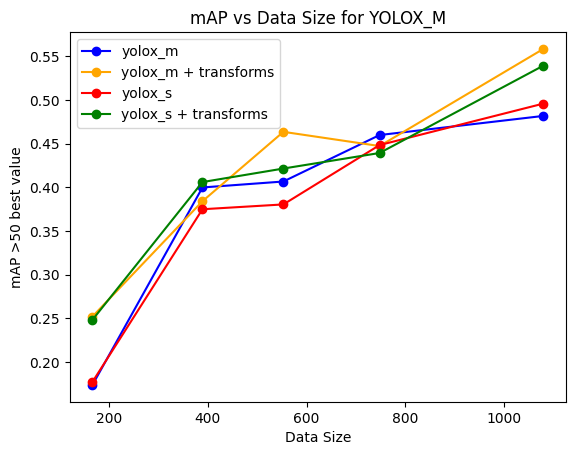

In [47]:
map_values_base = get_column_values(df, ['yolox_m_dnB10train.txt_bs8_lr1e-04_07-23_22', 
                    'yolox_m_dndata_389.txt_bs8_lr1e-04_07-23_23', 
                    'yolox_m_dndata_553.txt_bs8_lr1e-04_07-24_00', 
                    'yolox_m_dndata_748.txt_bs8_lr1e-04_07-24_03',
                    'yolox_m_uaTrue_nc6_ep200_bs8_lr1e-04_wd5e-04_07-21_10'])
data_sizes_base = [166, 389, 553, 748, 1080]
map_values_stock = get_column_values(df, ['yolox_m_dns.txt_bs8_lr1e-04_07-23_22', 
                                       'yolox_m_dndata_393_s.txt_bs8_lr1e-04_07-24_00',
                                       'yolox_m_dndata_556_s.txt_bs8_lr1e-04_07-24_01',
                                       'yolox_m_dndata_723_s.txt_bs8_lr1e-04_07-24_02']) 
data_sizes_stock = [170, 393, 556, 723, 1080]
map_values_base_t = get_column_values(df, ['yolox_m_uaTrue_transformsTrue_dn(B10train.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-31_02', 
                                       'yolox_m_uaTrue_transformsTrue_dn(data_389.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-31_01',
                                       'yolox_m_uaTrue_transformsTrue_dn(data_553.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_20',
                                       'yolox_m_uaTrue_transformsTrue_dn(data_748.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-31_00',
                                       'yolox_m_uaTrue_transformsTrue_dn()_nc6_ep300_bs8_lr1e-04_wd5e-04_07-30_02'
                                       ]) 

map_values_stock_t = get_column_values(df, ['yolox_m_uaTrue_transformsTrue_dn(s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-31_03', 
                                       'yolox_m_uaTrue_transformsTrue_dn(data_393_s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_19',
                                       'yolox_m_uaTrue_transformsTrue_dn(data_556_s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_21',
                                       'yolox_m_uaTrue_transformsTrue_dn(data_723_s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_22',
                                       'yolox_m_uaTrue_transformsTrue_dn()_nc6_ep300_bs8_lr1e-04_wd5e-04_07-30_02']) 

plt.figure()
plt.plot(data_sizes_base, map_values_base, label='yolox_m', color='blue', marker='o')
# plt.plot(data_sizes_stock, map_values_stock, label='mAP vs Data Size', color='red', marker='o')
plt.plot(data_sizes_base, map_values_base_t, label='yolox_m + transforms', color='orange', marker='o')
# plt.plot(data_sizes_stock, map_values_stock_t, label='mAP vs Data Size', color='purple', marker='o')
plt.xlabel('Data Size')
plt.ylabel('mAP >50 best value')
plt.title('mAP vs Data Size for YOLOX_M')
# plt.show()

map_values_base = get_column_values(df, ['yolox_s_dnB10train.txt_bs8_lr1e-04_07-22_10', 
                    'yolox_s_dndata_389.txt_bs8_lr1e-04_07-22_10', 
                    'yolox_s_dndata_553.txt_bs8_lr1e-04_07-22_12', 
                    'yolox_s_dndata_748.txt_bs8_lr1e-04_07-22_19',
                    'yolox_s_uaTrue_nc6_ep200_bs8_lr1e-04_wd5e-04_07-21_11'])
map_values_stock = get_column_values(df, ['yolox_s_dns.txt_bs8_lr1e-04_07-22_10', 
                                       'yolox_s_dndata_393_s.txt_bs8_lr1e-04_07-22_11',
                                       'yolox_s_dndata_556_s.txt_bs8_lr1e-04_07-22_12',
                                       'yolox_s_dndata_723_s.txt_bs8_lr1e-04_07-22_18']) 
map_values_base_t = get_column_values(df, ['yolox_s_uaTrue_transformsTrue_dn(B10train.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_05', 
                                       'yolox_s_uaTrue_transformsTrue_dn(data_389.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_05',
                                       'yolox_s_uaTrue_transformsTrue_dn(data_553.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_14',
                                       'yolox_s_uaTrue_transformsTrue_dn(data_748.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_17',
                                       'yolox_s_uaTrue_transformsTrue_dn()_nc6_ep300_bs8_lr1e-04_wd5e-04_07-30_00']) 

map_values_stock_t = get_column_values(df, ['yolox_s_uaTrue_transformsTrue_dn(s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_04', 
                                       'yolox_s_uaTrue_transformsTrue_dn(data_393_s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_14',
                                       'yolox_s_uaTrue_transformsTrue_dn(data_556_s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_15',
                                       'yolox_s_uaTrue_transformsTrue_dn(data_723_s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_16']) 

# plt.figure()
plt.plot(data_sizes_base, map_values_base, label='yolox_s', color='red', marker='o')
# plt.plot(data_sizes_stock, map_values_stock, label='mAP vs Data Size', color='red', marker='o')
plt.plot(data_sizes_base, map_values_base_t, label='yolox_s + transforms', color='green', marker='o')
plt.legend()
# plt.plot(data_sizes_stock, map_values_stock_t, label='mAP vs Data Size', color='purple', marker='o')
# plt.xlabel('Data Size')
# plt.ylabel('mAP >50 best value')
plt.show()


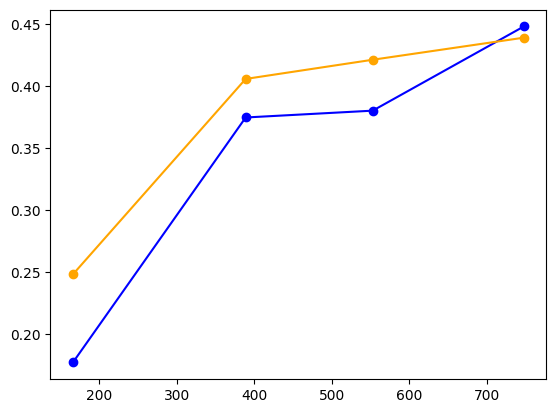

In [39]:
map_values_base = get_column_values(df, ['yolox_s_dnB10train.txt_bs8_lr1e-04_07-22_10', 
                    'yolox_s_dndata_389.txt_bs8_lr1e-04_07-22_10', 
                    'yolox_s_dndata_553.txt_bs8_lr1e-04_07-22_12', 
                    'yolox_s_dndata_748.txt_bs8_lr1e-04_07-22_19'])
data_sizes_base = [166, 389, 553, 748]
map_values_stock = get_column_values(df, ['yolox_s_dns.txt_bs8_lr1e-04_07-22_10', 
                                       'yolox_s_dndata_393_s.txt_bs8_lr1e-04_07-22_11',
                                       'yolox_s_dndata_556_s.txt_bs8_lr1e-04_07-22_12',
                                       'yolox_s_dndata_723_s.txt_bs8_lr1e-04_07-22_18']) 
data_sizes_stock = [170, 393, 556, 723]
map_values_base_t = get_column_values(df, ['yolox_s_uaTrue_transformsTrue_dn(B10train.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_05', 
                                       'yolox_s_uaTrue_transformsTrue_dn(data_389.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_05',
                                       'yolox_s_uaTrue_transformsTrue_dn(data_553.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_14',
                                       'yolox_s_uaTrue_transformsTrue_dn(data_748.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_17']) 

map_values_stock_t = get_column_values(df, ['yolox_s_uaTrue_transformsTrue_dn(s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_04', 
                                       'yolox_s_uaTrue_transformsTrue_dn(data_393_s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_14',
                                       'yolox_s_uaTrue_transformsTrue_dn(data_556_s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_15',
                                       'yolox_s_uaTrue_transformsTrue_dn(data_723_s.txt)_nc6_ep200_bs8_lr1e-04_wd5e-04_07-30_16']) 

# plt.figure()
plt.plot(data_sizes_base, map_values_base, label='mAP vs Data Size', color='blue', marker='o')
# plt.plot(data_sizes_stock, map_values_stock, label='mAP vs Data Size', color='red', marker='o')
plt.plot(data_sizes_base, map_values_base_t, label='mAP vs Data Size', color='orange', marker='o')
# plt.plot(data_sizes_stock, map_values_stock_t, label='mAP vs Data Size', color='purple', marker='o')
# plt.xlabel('Data Size')
# plt.ylabel('mAP >50 best value')
plt.show()

In [ ]:
categories = ['']